In [1]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d biaiscience/dogs-vs-cats

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats
License(s): DbCL-1.0
 98% 802M/817M [00:07<00:00, 62.2MB/s]
100% 817M/817M [00:07<00:00, 111MB/s] 


In [2]:
import zipfile
zipf = zipfile.ZipFile('dogs-vs-cats.zip')
zipf.extractall()
zipf.close()

In [3]:
import os
a= os.listdir('train/train')


In [4]:
import os
import numpy as np
from tqdm import tqdm
import pandas as pd
import os
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D
import matplotlib.pyplot as plt
import librosa
from PIL import Image
import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , LeakyReLU
from keras.layers import Conv2D, Dense, Activation, Dropout, MaxPool2D, Flatten, LeakyReLU
from tensorflow.keras.regularizers import L1

In [5]:
image =[]
label=[]
for i in tqdm(range(9000)):
  img= Image.open('train/train/'+a[i])
  img= img.resize((250,250))
  img= np.array(img)
  image.append(img)
  if a[i][:3] == 'dog':
    label.append(0)
  else:
    label.append(1)

100%|██████████| 9000/9000 [00:38<00:00, 234.58it/s]


In [6]:
image= np.asarray(image)
label= np.asarray(label)
label = keras.utils.to_categorical(label,num_classes=2)

In [7]:
print(image.shape , label.shape)

(9000, 250, 250, 3) (9000, 2)


In [8]:
cat,dog= 0,0
for i in label:
  if i[0] == 0:
    cat +=1
  else:dog +=1
print(dog,cat)

4458 4542


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(image, label, test_size=0.2, random_state=42)
print(X_train.shape)

(7200, 250, 250, 3)


In [10]:
from tensorflow.keras.layers import Conv2D,Conv1D,MaxPooling2D,MaxPooling1D,MaxPool1D,MaxPool2D,Dense,Flatten,Dropout,SeparableConv2D,LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import L1

In [11]:
model = Sequential()
model.add(Conv2D(128, [5,5], strides = [2,2], padding = 'same', input_shape=(250,250,3),kernel_regularizer=L1(0.01)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'same'))


model.add(Conv2D(256, [5,5], padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'same'))

model.add(Conv2D(256, [1,1], padding = 'same'))
model.add(Conv2D(256, [3,3], padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'same'))

model.add(Conv2D(512, [1,1], padding = 'same'))
model.add(Conv2D(512, [3,3], padding = 'same',activation = 'relu'))
model.add(Conv2D(512, [1,1], padding = 'same'))
model.add(Conv2D(512, [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPool2D(padding = 'same'))
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
from tensorflow.keras.optimizers import Adam
from keras import optimizers
opt = optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer =  opt , loss = 'categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_acc',patience=5,restore_best_weights=True)

In [18]:
history = model.fit(X_train,y_train,batch_size=100,epochs=1,validation_data=(X_test,y_test),callbacks=[early_stopping])

72/72 ━━━━━━━━━━━━━━━━━━━━ 39s 536ms/step - acc: 0.9869 - loss: 0.1517 - val_acc: 0.8733 - val_loss: 0.6161


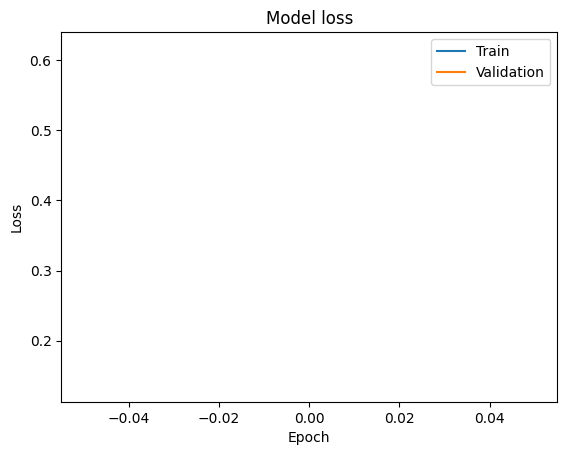

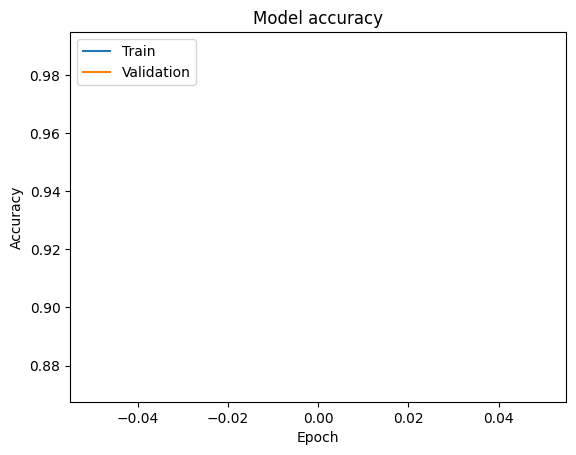

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# Plot training & validation accuracy values
def plot_accuracy(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot the loss and accuracy
plot_loss(history)
plot_accuracy(history)
